/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


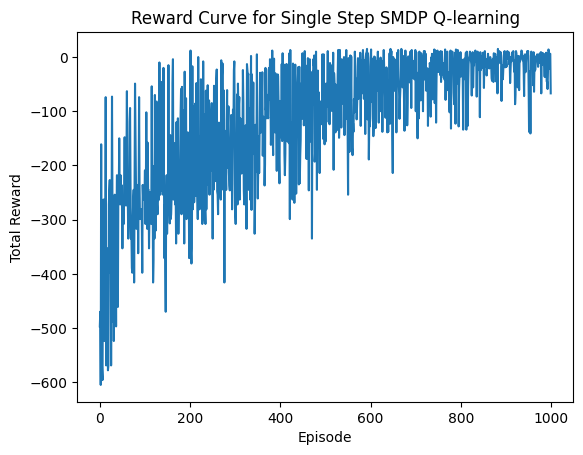

Learned Q-values:
[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.53972439 -3.49046704 -3.4015623  -3.43459691 -2.27565776 -5.53153403]
 [-1.48009204 -0.72018505 -2.05965626 -1.1368356   7.58165453 -2.46545346]
 ...
 [-1.22478977 -0.8847696  -1.22478977 -1.25429291 -2.80395348 -2.89395524]
 [-2.52827906 -2.55422215 -2.52827906 -2.52507323 -3.79895863 -4.37597281]
 [-0.199      -0.199      -0.199       6.7722874  -1.         -1.        ]]


In [1]:
import numpy as np
import gym

def single_step_smdp_q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    q_values = np.zeros((env.observation_space.n, env.action_space.n))  # Q-values initialization

    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Choose action using epsilon-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_values[state])  # Exploit

            next_state, reward, done, _ = env.step(action)

            # Update Q-value using single-step SMDP Q-learning
            q_values[state, action] += alpha * (reward + gamma * np.max(q_values[next_state]) - q_values[state, action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return q_values, rewards

# Create Taxi-v3 environment
env = gym.make('Taxi-v3')

# Run Single Step SMDP Q-learning
q_values_smdp, rewards_smdp = single_step_smdp_q_learning(env)

# Plot reward curves
import matplotlib.pyplot as plt

plt.plot(rewards_smdp)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Curve for Single Step SMDP Q-learning')
plt.show()

# Visualize learned Q-values
print("Learned Q-values:")
print(q_values_smdp)


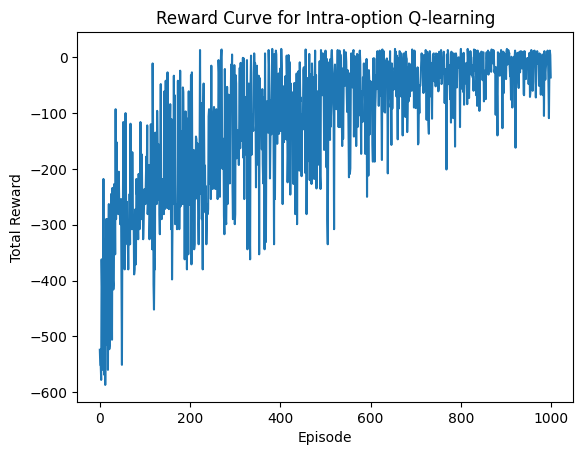

Learned Q-values:
[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.60334703 -3.50019783 -3.44936759 -3.5212131  -2.26415407 -6.67603275]
 [-1.84194494 -1.23235742 -1.94582262 -1.96649259  7.40879288 -2.92917144]
 ...
 [-0.95617925  1.44568519 -0.95617925 -1.04751056 -1.         -1.        ]
 [-2.28846567 -2.3393785  -2.29542719 -2.35857321 -3.69717296 -2.752048  ]
 [-0.199      -0.199      -0.28729     8.67842327 -1.         -1.        ]]


In [2]:
def intra_option_q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    q_values = np.zeros((env.observation_space.n, env.action_space.n))  # Q-values initialization

    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Choose action using epsilon-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_values[state])  # Exploit

            next_state, reward, done, _ = env.step(action)

            # Update Q-value using intra-option Q-learning
            q_values[state, action] += alpha * (reward + gamma * np.max(q_values[next_state]) - q_values[state, action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return q_values, rewards

# Run Intra-option Q-learning
q_values_intra_option, rewards_intra_option = intra_option_q_learning(env)

# Plot reward curves
plt.plot(rewards_intra_option)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Curve for Intra-option Q-learning')
plt.show()

# Visualize learned Q-values
print("Learned Q-values:")
print(q_values_intra_option)


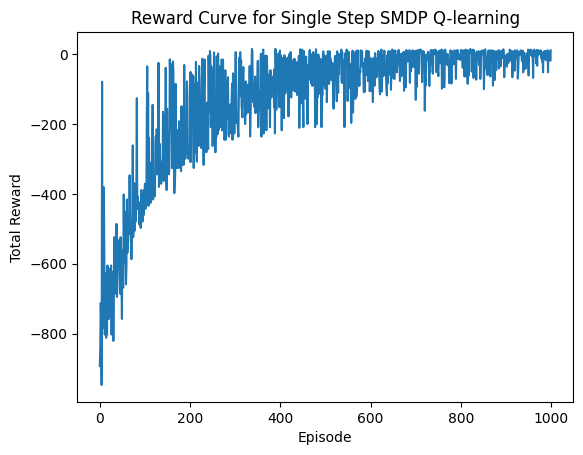

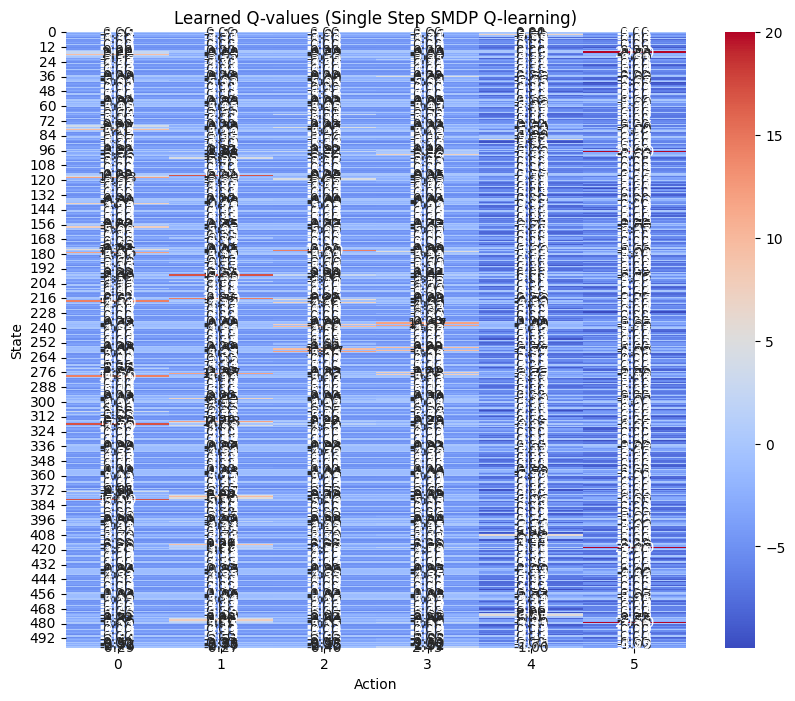

In [5]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns

def single_step_smdp_q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    # Initialize Q-table
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # List to store rewards
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            # Perform action and observe the next state and reward
            next_state, reward, done, _ = env.step(action)

            # Update Q-value using SMDP Q-learning update rule
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            # Update state and accumulate reward
            state = next_state
            total_reward += reward

        # Append total reward for the episode
        rewards.append(total_reward)

        # Decay epsilon for exploration-exploitation trade-off
        epsilon = max(epsilon * 0.99, 0.01)  # Decay rate

    return q_table, rewards

# Create the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Set hyperparameters
num_episodes = 1000
alpha = 0.1
gamma = 0.9
epsilon = 1.0

# Run Single Step SMDP Q-learning
q_table, rewards = single_step_smdp_q_learning(env, num_episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon)

# Plot reward curve
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Curve for Single Step SMDP Q-learning')
plt.show()

# Visualize learned Q-values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(q_table, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.xlabel('Action')
plt.ylabel('State')
plt.title('Learned Q-values (Single Step SMDP Q-learning)')
plt.show()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[-893, -677, -767, -749, -758, -785, -758, -632, -659, -848, -704, -812, -776, -731, -785, -767, -632, -704, -713, -677, -659, -722, -215, -623, -731, -623, -758, -300, -686, -605, -623, -650, -596, -587, -713, -650, -632, -533, -641, -632, -686, -412, -605, -569, -596, -596, -596, -704, -569, -569, -560, -605, -533, -578, -587, -506, -551, -334, -488, -542, -542, -524, -479, -479, -71, -542, -166, -533, -551, -434, -320, -533, -524, -338, -488, -51, -569, -345, -488, -506, -569, -434, -380, -221, -470, -355, -461, -398, -488, -488, -425, -412, -398, -254, -389, -389, -398, -353, -461, -416, -412, -371, -197, -398, -353, -141, -461, -443, -398, -425, -353, -362, -470, -371, -398, -443, -362, -147, -184, -416, -69, -219, -380, -310, -398, -353, -335, -290, -353, -398, -37, -74, -358, -380, -407, -194, -353, -241, -398, -344, -362, -317, -371, -308, -317, -344, -326, -317, -380, -91, -176, -326, -308, -362, -59, -41, -252, -91, -326, -129, -344, -371, -299, -174, -27, -44, -281, -94, -26

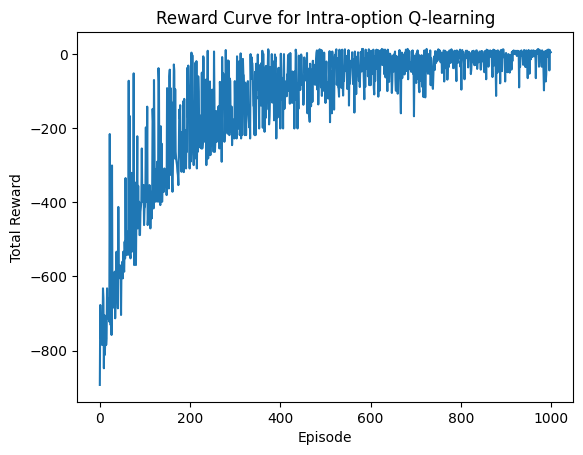

In [8]:
import numpy as np
import gym

# Define a custom Taxi environment with hierarchical actions (options)
class HierarchicalTaxiEnv(gym.Env):
    def __init__(self):
        self.env = gym.make('Taxi-v3')
        self.action_space = gym.spaces.Discrete(6)  # 6 actions including 4 directions, pick-up, and drop-off
        self.observation_space = self.env.observation_space

    def step(self, action):
        if action < 4:  # Primitive actions: move in a direction
            return self.env.step(action)
        elif action == 4:  # Option: pick up passenger
            return self.env.step(4)  # Always pick-up action
        elif action == 5:  # Option: drop off passenger
            return self.env.step(5)  # Always drop-off action

    def reset(self):
        return self.env.reset()

    def render(self):
        return self.env.render()

def intra_option_q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))  # Q-values initialization
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            next_state, reward, done, _ = env.step(action)

            # Update Q-value using Intra-option Q-learning update rule
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

        # Decay epsilon for exploration-exploitation trade-off
        epsilon = max(epsilon * 0.99, 0.01)  # Decay rate

    return q_table, rewards

# Create HierarchicalTaxiEnv with options
env_hierarchical_taxi = HierarchicalTaxiEnv()

# Set hyperparameters
num_episodes = 1000
alpha = 0.1
gamma = 0.9
epsilon = 1.0

# Run Intra-option Q-learning
q_table_intra_option, rewards_intra_option = intra_option_q_learning(env_hierarchical_taxi, num_episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon)

# Print rewards or plot reward curve (optional)
print(rewards_intra_option)
plt.plot(rewards_intra_option)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Curve for Intra-option Q-learning')
plt.show()

# Visualize learned Q-values as a heatmap (optional)
# Note: Q-table shape may need to be adjusted based on the specific environment and action space
# Example: plt.imshow(q_table_intra_option, cmap='hot', interpolation='nearest')


** **Final Code** **

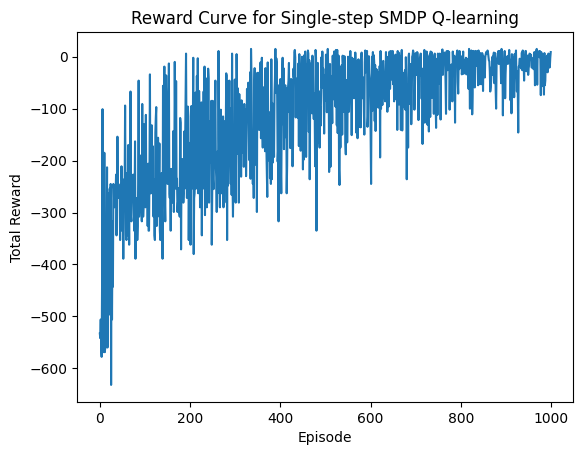

Learned Q-values (Single-step SMDP Q-learning):
[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.32802022 -3.25217766 -3.40948285 -3.37263473 -0.56920549 -4.82837261]
 [-1.47446474 -0.81890261 -2.12734874 -1.96670849  7.35640482 -1.99      ]
 ...
 [-1.21673173 -0.58657191 -1.13615128 -1.14909337 -1.99       -2.81211874]
 [-2.52459246 -2.50208418 -2.51307822 -2.58063298 -2.73601    -3.79546808]
 [-0.199      -0.21111786 -0.199       3.06186074 -1.         -1.        ]]


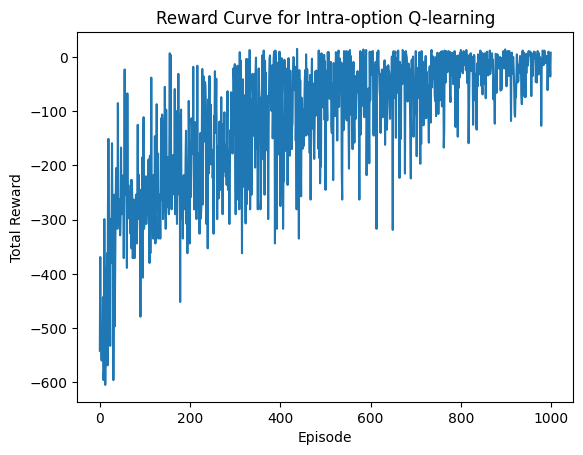

Learned Q-values (Intra-option Q-learning):
[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.45070098 -3.49768323 -3.4489212  -3.48346206 -1.70137726 -4.71278208]
 [-2.00534252 -1.97623035 -2.08522714  0.04976513  6.77434391 -1.96385252]
 ...
 [-1.12801184 -1.07916592 -1.13615128 -1.1448871  -1.99       -2.81189229]
 [-2.45023162 -2.43522087 -2.44622879 -2.50244993 -2.9701     -3.80957291]
 [-0.199      -0.199      -0.199       3.64185781 -1.         -1.        ]]


In [3]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Function to initialize Q-values for states and options
def initialize_q_values(env):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    num_options = 6  # Including primitive actions and two higher-level options

    return np.zeros((num_states, num_actions))

# Single-step SMDP Q-learning algorithm
def single_step_smdp_q_learning(env, q_values, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False

        while not done:
            # Choose action using epsilon-greedy policy over options
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_values[state])  # Exploit

            next_state, reward, done, _ = env.step(action)

            # Update Q-value for the selected option
            q_values[state, action] += alpha * (reward + gamma * np.max(q_values[next_state]) - q_values[state, action])

            state = next_state
            episode_reward += reward

        rewards.append(episode_reward)

    return q_values, rewards

# Intra-option Q-learning algorithm
def intra_option_q_learning(env, q_values, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False

        while not done:
            # Choose action using epsilon-greedy policy over actions (including options)
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_values[state])  # Exploit

            next_state, reward, done, _ = env.step(action)

            # Update Q-value for the selected action (or option)
            q_values[state, action] += alpha * (reward + gamma * np.max(q_values[next_state]) - q_values[state, action])

            state = next_state
            episode_reward += reward

        rewards.append(episode_reward)

    return q_values, rewards

# Function to plot reward curve
def plot_rewards(rewards, title):
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title(title)
    plt.show()

# Create and run the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Set hyperparameters
num_episodes = 1000
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Initialize Q-values for states and options
q_values_smdp = initialize_q_values(env)
q_values_intra_option = initialize_q_values(env)

# Run single-step SMDP Q-learning
q_values_smdp, rewards_smdp = single_step_smdp_q_learning(env, q_values_smdp, num_episodes, alpha, gamma, epsilon)

# Plot reward curve for single-step SMDP Q-learning
plot_rewards(rewards_smdp, 'Reward Curve for Single-step SMDP Q-learning')

# Display learned Q-values as a table for single-step SMDP Q-learning
print("Learned Q-values (Single-step SMDP Q-learning):")
print(q_values_smdp)

# Run intra-option Q-learning
q_values_intra_option, rewards_intra_option = intra_option_q_learning(env, q_values_intra_option, num_episodes, alpha, gamma, epsilon)

# Plot reward curve for intra-option Q-learning
plot_rewards(rewards_intra_option, 'Reward Curve for Intra-option Q-learning')

# Display learned Q-values as a table for intra-option Q-learning
print("Learned Q-values (Intra-option Q-learning):")
print(q_values_intra_option)
s